<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

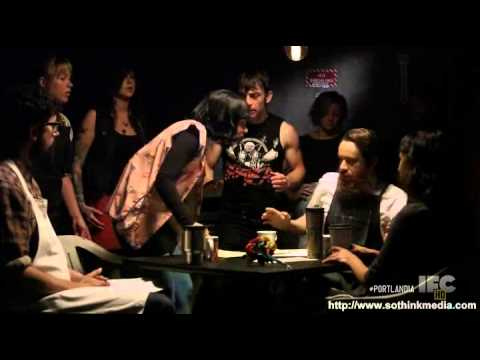

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
# Imports
import pandas as pd

import re
import squarify
import matplotlib.pyplot as plt

from collections import Counter

import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [3]:
# Current working directory
%pwd

'/Users/JKMacBook/Documents/Lambda/NLP/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [4]:
# Load the data
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
# Clean full_review_text - remove date, check-in, keep on letters and numbers, convert to lowercase
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('\d+\/\d+\/\d+', '', x))
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('^.*?([A-Z])', '\\1', x))
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub(r'[^a-zA-Z ^0-9]', '', x))
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())

# Convert star_rating to integer
shops['star_rating'] = shops['star_rating'].apply(lambda x: int(x[1]))

shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,love love loved the atmosphere every corner of...,5
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4


In [6]:
shops.describe()

,star_rating
count,7616.000000
mean,4.169118
std,1.065311
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [7]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'im', 'ive', 'place', 'austin', 'come', 'definitely', 'order',
                                            'spot', 'ordered'])

In [8]:
# Tokenizer pipe removing stop words and blank words and lemmatizing
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    for token in doc:
        if (token.text not in STOP_WORDS) & (token.text != ' '):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)

shops['tokens'] = tokens
shops['tokens'].head()

0    [love, love, love, atmosphere, corner, shop, s...
1    [list, date, night, ambiance, beautiful, love,...
2    [list, brunch, spot, love, eclectic, homey, pl...
3    [cool, decor, good, drink, nice, seat, overpri...
4    [locate, northcross, mall, shop, center, face,...
Name: tokens, dtype: object

In [9]:
# Create a count function
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [10]:
# Create a word count dataframe
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
156,good,2879,4147,1.0,0.012318,0.012318,0.378020
116,great,2844,3930,2.0,0.011673,0.023991,0.373424
132,like,2266,3361,3.0,0.009983,0.033975,0.297532
469,time,1752,2379,4.0,0.007066,0.041041,0.230042
18,drink,1650,2374,5.0,0.007052,0.048092,0.216649


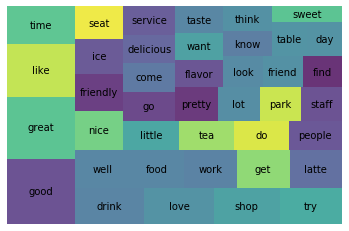

In [11]:
# Graph the word count
wc_top20 = wc[wc['rank'] <= 40]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [12]:
shops['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

In [13]:
# Check top words for 4 and 5 ratings
shops_45 = shops[shops['star_rating'] >= 4]
wc = count(shops_45['tokens'])
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
116,great,2496,3461,1.0,0.013225,0.013225,0.406515
188,good,2276,3239,2.0,0.012377,0.025602,0.370684
163,like,1672,2420,3.0,0.009247,0.034850,0.272313
25,love,1604,2117,4.0,0.008090,0.042939,0.261238
28,shop,1349,1813,5.0,0.006928,0.049867,0.219707
374,time,1331,1766,6.0,0.006748,0.056615,0.216775
18,drink,1285,1761,7.0,0.006729,0.063344,0.209283
86,try,1327,1704,8.0,0.006511,0.069856,0.216124
280,well,1351,1650,9.0,0.006305,0.076161,0.220033
19,latte,1031,1538,10.0,0.005877,0.082038,0.167915


In [14]:
# Check top words for 1 thru 3 ratings
shops_13 = shops[shops['star_rating'] <= 3]
wc = count(shops_13['tokens'])
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
2,like,594,941,1.0,0.012552,0.012552,0.402439
33,good,603,908,2.0,0.012112,0.024664,0.408537
11,drink,365,613,3.0,0.008177,0.032841,0.247290
207,time,421,613,4.0,0.008177,0.041018,0.285230
114,food,316,494,5.0,0.006589,0.047607,0.214092
138,great,348,469,6.0,0.006256,0.053863,0.235772
156,do,352,449,7.0,0.005989,0.059852,0.238482
1,service,346,447,8.0,0.005963,0.065815,0.234417
10,get,333,443,9.0,0.005909,0.071724,0.225610
55,go,332,433,10.0,0.005776,0.077500,0.224932


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

